In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\Kevin\\Desktop\\Data3001\datascience-cis-2022.csv")
df.head(5)

,time,FromInternetTCPPort443IPurn:ietf:params:mud:controllerByteCount,FromInternetTCPPort443IPurn:ietf:params:mud:controllerPacketCount,FromInternetTCPPort554IPurn:ietf:params:mud:controllerByteCount,FromInternetTCPPort554IPurn:ietf:params:mud:controllerPacketCount,FromInternetTCPPort80IPurn:ietf:params:mud:controllerByteCount,FromInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount,FromInternetUDPPort67IPurn:ietf:params:mud:controllerByteCount,FromInternetUDPPort67IPurn:ietf:params:mud:controllerPacketCount,ToInternetRSVPPortAllIPurn:ietf:params:mud:controllerByteCount,...,ToInternetTCPPort554IPurn:ietf:params:mud:controllerPacketCount,ToInternetTCPPort80IPurn:ietf:params:mud:controllerByteCount,ToInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount,ToInternetUDPPort1024IPurn:ietf:params:mud:controllerByteCount,ToInternetUDPPort1024IPurn:ietf:params:mud:controllerPacketCount,ToLocalUDPPort5353IP224.0.0.251/32ByteCount,ToLocalUDPPort5353IP224.0.0.251/32PacketCount,ToLocalUDPPort67IP255.255.255.255/32ByteCount,ToLocalUDPPort67IP255.255.255.255/32PacketCount,device_mac
0,1662078299417000000,0,0,0,0,0,0,0,0,3568,...,0,395738,957,12625992,9093,0,0,0,0,bd:0d:8e:c5
1,1662078299417000000,0,0,0,0,71161,266,0,0,1784,...,11246,68385,150,0,0,0,0,0,0,bd:24:bb:1e
2,1662078299417000000,0,0,0,0,25880,91,0,0,3568,...,0,103786,243,0,0,0,0,0,0,bd:0d:af:0b
3,1662078299417000000,0,0,0,0,0,0,0,0,3568,...,0,29638,81,0,0,0,0,0,0,ee:dd:34:1d
4,1662078299417000000,0,0,0,0,0,0,1400,4,1784,...,9857,0,0,0,0,0,0,906,2,ee:dd:39:08


In [4]:
df['time'].nunique()

134913

In [5]:
print(len(df['device_mac'].unique()))
df.isnull().sum()

753


time                                                                 0
FromInternetTCPPort443IPurn:ietf:params:mud:controllerByteCount      0
FromInternetTCPPort443IPurn:ietf:params:mud:controllerPacketCount    0
FromInternetTCPPort554IPurn:ietf:params:mud:controllerByteCount      0
FromInternetTCPPort554IPurn:ietf:params:mud:controllerPacketCount    0
FromInternetTCPPort80IPurn:ietf:params:mud:controllerByteCount       0
FromInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount     0
FromInternetUDPPort67IPurn:ietf:params:mud:controllerByteCount       0
FromInternetUDPPort67IPurn:ietf:params:mud:controllerPacketCount     0
ToInternetRSVPPortAllIPurn:ietf:params:mud:controllerByteCount       0
ToInternetRSVPPortAllIPurn:ietf:params:mud:controllerPacketCount     0
ToInternetTCPPort443IPurn:ietf:params:mud:controllerByteCount        0
ToInternetTCPPort443IPurn:ietf:params:mud:controllerPacketCount      0
ToInternetTCPPort554IPurn:ietf:params:mud:controllerByteCount        0
ToInte

In [8]:
duplicate = df[df.duplicated[keep='last']]
duplicate.shape

(0, 24)

In [14]:
df['time'].head(5)

0    1662078299417000000
1    1662078299417000000
2    1662078299417000000
3    1662078299417000000
4    1662078299417000000
Name: time, dtype: int64

In [3]:
#converting from unix time to regular
df['time'] = pd.to_datetime(df['time'], unit='ns')
df['time'].head

<bound method NDFrame.head of 0          2022-09-02 00:24:59.417
1          2022-09-02 00:24:59.417
2          2022-09-02 00:24:59.417
3          2022-09-02 00:24:59.417
4          2022-09-02 00:24:59.417
                     ...          
14376693   2022-09-16 00:23:55.620
14376694   2022-09-16 00:23:55.620
14376695   2022-09-16 00:23:55.620
14376696   2022-09-16 00:23:55.620
14376697   2022-09-16 00:23:55.620
Name: time, Length: 14376698, dtype: datetime64[ns]>

In [10]:
# data spans a fortnite, with data being collected every minute
print(df['time'].min())
print(df['time'].max())
print(df['time'].max() - df['time'].min())

2022-09-02 00:24:59.417000
2022-09-16 00:23:55.620000
13 days 23:58:56.203000


In [ ]:
#13 days 23:58 -> 20158 minutes, Therefore should be 20158 * 753 entries = 15178974, there are 14376697
# either 802277 data points missing, 1065 minutes of data missing or there is a point where cameras are off

In [11]:
# testing with device bd:0d:8e:c5
df_test = df[["time", "ToInternetTCPPort80IPurn:ietf:params:mud:controllerByteCount", 
              "ToInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount",
              "ToInternetUDPPort1024IPurn:ietf:params:mud:controllerByteCount",
             "ToInternetUDPPort1024IPurn:ietf:params:mud:controllerPacketCount", "device_mac"]]
test = df_test.loc[df_test["device_mac"] == "bd:0d:8e:c5"]
test.head(5)

,time,ToInternetTCPPort80IPurn:ietf:params:mud:controllerByteCount,ToInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount,ToInternetUDPPort1024IPurn:ietf:params:mud:controllerByteCount,ToInternetUDPPort1024IPurn:ietf:params:mud:controllerPacketCount,device_mac
0,2022-09-02 00:24:59.417,395738,957,12625992,9093,bd:0d:8e:c5
774,2022-09-02 00:25:59.386,415242,1004,12193996,8775,bd:0d:8e:c5
1525,2022-09-02 00:26:59.365,409825,979,12459296,8993,bd:0d:8e:c5
2246,2022-09-02 00:27:59.422,393513,962,12473905,9003,bd:0d:8e:c5
2999,2022-09-02 00:28:59.461,395554,955,12659277,9135,bd:0d:8e:c5


In [10]:
# index the time data
index = test.pivot(index='time', columns='device_mac')
index.head()

NameError: name 'test' is not defined

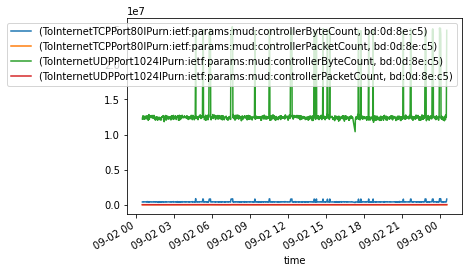

In [33]:

index['2022-09-02 00:30:00':'2022-09-03 00:30:00'].plot()
plt.legend(fontsize=10)

In [2]:
# plot for 80, do time series for minute - to day or hour, plot on top of each other look at correlation
plt.figure(1)
plt.plot(test.time, test["ToInternetTCPPort80IPurn:ietf:params:mud:controllerByteCount"], label='80_ByteCount', marker='o')

plt.title("ts Tointernet80 Byte for device bd:0d:8e:c5")
plt.xlabel("Time")
plt.ylabel("Value")

plt.figure(2)
plt.plot(test.time, test["ToInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount"], label='80_PacketCount', marker='o')
plt.title("ts Tointernet80 Packet for device bd:0d:8e:c5")
plt.xlabel("time")
plt.ylabel("value")

NameError: name 'plt' is not defined

In [1]:
#plot packet for 80 and 1024
plt.plot(test.time, test.ToInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount, label='80_PacketCount', linewidth=3)
plt.plot(test.time, test.ToInternetUDPPort1024IPurn:ietf:params:mud:controllerPacketCount, label='1024_PacketCount', linewidth=3)

SyntaxError: invalid syntax (<ipython-input-1-5d8ac39c7b86>, line 2)

In [ ]:
display(df.to_string())